In [34]:
#Dependencies
import pandas as pd
from random import uniform
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import datetime as dt
import json
import os
import numpy as np
from citipy import citipy
# from google.colab import files
# Import API key
from config import api_key
date = dt.date.today()
# Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy




# output_data_file.write('Open file for inputting api websites\n')
# output_data_file.close()
# myFile = open('example2.csv', 'w')

In [35]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
# lon = "-111.279592" test values
# lat = "42.972357" test values
# api_key = "db9924354313017f1a2d1f43bfdc0894"


In [36]:
# Build list of coordinates
lon_data = []
lat_data = []
id_city =[]
cities = []
temp = []
cloudy = []
wind = []
lon_df = []
lat_df = []
city = []
city_df = []
humidity = []
lat_lngs = []
summary = ["name", "id", "coord.lat", "coord.lon", "main.temp", "clouds.all", "wind.speed", "humidty"]
  
# iterate through random numbers specified for latitude and longitude
# build dictionary of lat and lon numbers to search through

# for x in range(3000):
#  lon = np.random.uniform(-180,180) 
#  lon_data.append(lon)
#  lat = np.random.uniform(-90, 90)
#  lat_data.append(lat)
lat = np.random.uniform(low=-90.00000, high = 90.00000, size = 3000)
lon = np.random.uniform(low=-180.00000, high = 180.00000, size = 3000)
lat_lngs = zip(lat, lon)  
# len(cities)
# print (lat_data)
# print (lon_data)

In [37]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities: # and city != 'ciras':
        cities.append(city)
# print(cities)        

In [38]:
# set up iteration to build dataframe containing variables of interest
# points set to number of longitudal variables round
points = range(len(cities))
# with output_data_file:
#    writer = csv.writer(output_data_file)
for city in cities:
# for i in points:
#    query_url = url + "appid=" + api_key  + "&lon=" + str(lon_data[i]) + "&lat=" + str(lat_data[i]) + "&units=imperial"
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    # create json summary  
    summary = requests.get(query_url)
    summary = summary.json()
# print to write file

# push through each variable of interest build lists for dataframe
#    if (summary['cod'] != '404'):
    try:
        city_df.append(summary['name'])
        id_city.append(summary['id'])
        lat_df.append(summary['coord']['lat'])
        lon_df.append(summary['coord']['lon'])
        temp.append(summary['main']['temp_max'])
        cloudy.append(summary['clouds']['all'])
        wind.append(summary['wind']['speed'])
        humidity.append(summary['main']['humidity'])
        writefilm_dict = {"City" : city_df, "City_Id" : id_city, "url: " : query_url}
        writefilm_dictdf = pd.DataFrame.from_dict(writefilm_dict)
        log = open("goat.txt", "w")
        print(writefilm_dictdf, file = log)
    except KeyError: 
        pass
        # print(query_url, file = log)
#    writer.writerows(query_url)

# myFile = open('example2.csv', 'w')
# with myFile:
#    writer = csv.writer(myFile)
#    writer.writerows(myData)   
# Print to log each iteration of city  
 # with open('log.txt', 'w') as f:
 #   print_log = { "City": city, "City_Id":id}
 #   f.write(str(query_url))  
  #log_to_printdf = pd.DataFrame.from_dict(print_log, orient = 'index')
  #log_to_printdf = log_to_printdf.to_csv(r'log.txt', header=None)
#files.download('log.txt')  

In [40]:

# city_df
# print(query_url)

In [41]:
# Setup summary dictionary
summary_dict = {
    "City" : city_df,
    "City_Id" : id_city,
    "Latitude" : lat_df,
    "Longitude" : lon_df,
    "Max Temp" : temp,
    "Cloudy" : cloudy,
    "Wind Speed" : wind,
    "Humidity %" : humidity
}

In [42]:
# print (query_url)

In [43]:

# convert dictionary to dataframe
weather_data = pd.DataFrame.from_dict(summary_dict, orient='index')

# reformat axis
weather_df = weather_data.transpose()

# filter data make sure there is city data
weather_df = weather_df[weather_df["City"] != ""]

# filter again replacing cells without information
weather_df = weather_df.replace(to_replace='None', value=np.nan).dropna()

# weather_df to csv and check
len(weather_df)
weather_df.to_csv('data.csv', sep=',', index = True)

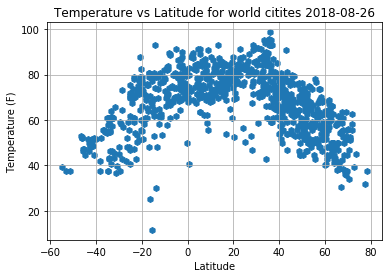

In [44]:
# Build a scatter plot for Max Temp
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="h")

# Graph properties
plt.title("Temperature vs Latitude for world citites " +str(date))

plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.show();
plt.savefig('Temperature2.png', bbox_inches = 'tight');

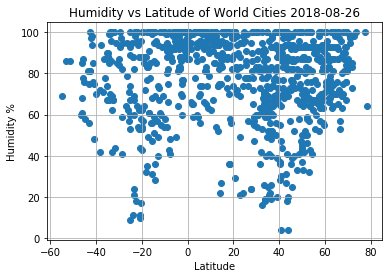

In [46]:
# Build a scatter plot for Humidity (%)
plt.scatter(weather_df["Latitude"], weather_df["Humidity %"], marker="o")

# Graph properties
plt.title("Humidity vs Latitude of World Cities "+str(date))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
# plt.show()
plt.savefig('Humidity2.png', bbox_inches = 'tight')

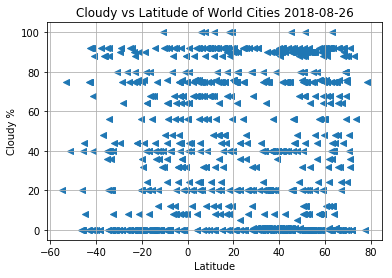

In [47]:
# Build a scatter plot for Cloudiness %
plt.scatter(weather_df["Latitude"], weather_df["Cloudy"], marker="<")

# Graph properties
plt.title("Cloudy vs Latitude of World Cities "+str(date))
plt.ylabel("Cloudy %")
plt.xlabel("Latitude")
plt.grid(True)
# plt.show()
plt.savefig('cloudy2.png', bbox_inches = 'tight')

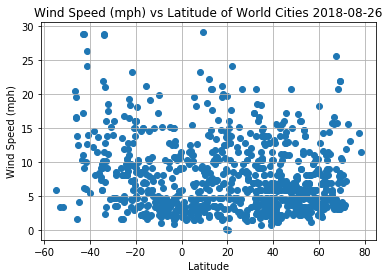

In [48]:
# Build a scatter plot for Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Graph properties
plt.title("Wind Speed (mph) vs Latitude of World Cities "+str(date))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.show()
plt.savefig('windspeed2.png', bbox_inches = 'tight')

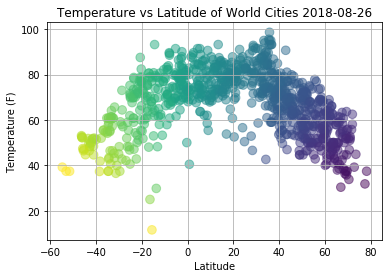

In [49]:
# Build a scatter plot for Max Temp
n=1024
Y = weather_df["Max Temp"]
X = weather_df["Latitude"]
T = np.arctan2(Y,X)

# plt.axes([0.025,0.025,0.95,0.95])
# plt.scatter(X,Y, s=75, c=T, alpha=.5)
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], s=75, c=T, alpha=.5)

# Graph properties
# plt.xlim(260,320)
# plt.ylim(-60,80)
plt.title("Temperature vs Latitude of World Cities "+str(date))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('tempcolors.png', bbox_inches = 'tight')